In [24]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib as plt
import statsmodels.formula.api as smf
%pylab inline


Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [126]:
#experiment setup:
alpha = 0.05

print ("chosen significance threshold:", alpha)

print ('NULL- H0: simpler model is better')

chosen significance threshold: 0.05
NULL- H0: simpler model is better


In [135]:
def line(a, b, x):
    '''creates a line with some scatter
    arguments:
    a: slope
    b: intercept
    x: independent variable (np.array)'''
    y = a * x + b
    yerr = np.random.randn(len(x))
    #add scatter roughtly Poisson level: gaussian distributed around mean of DV
    yerr = yerr * (np.sqrt(y).mean()) 
    return a * x + b + yerr

In [171]:
np.random.seed(19)
x = np.random.rand(10) * 10
line1 = line(5, 7 , x)

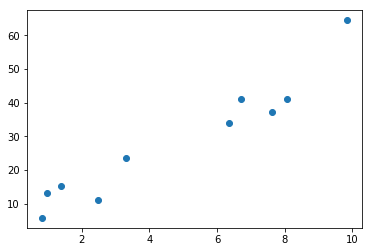

In [172]:
#create a dataframe to host the data (easier to work with statsmodels)
dfline = pd.DataFrame({'x': x, 'y': line1, 'x2' : x*x})
plt.plot(x, line1, 'o')

In [173]:
#fit a line y = a*x + b
fittedline= smf.ols(formula='y ~ x', data = dfline)
model = fittedline.fit()
model.summary()

//anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     87.74
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           1.38e-05
Time:                        00:09:58   Log-Likelihood:                -30.242
No. Observations:                  10   AIC:                             64.48
Df Residuals:                       8   BIC:                             65.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8155      3.183      1.199      0.265      -3.525      11.156
x              5.2237      0.558      9.367      0.000       3.938       6.510
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   2.727
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.674
Skew:                           0.311   Prob(JB):                        0.714
Kurtosis:                       1.891   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
#fit a parabola y - a*x^2 + b*x + c

fittedline2= smf.ols(formula='y ~ x2 + x', data = dfline)
#alternative syntax:
#fittedline2= smf.ols(formula='y ~ I(x**2) + x', data = dfline)
model2 = fittedline2.fit()
model2.summary()

//anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     55.12
Date:                Fri, 20 Oct 2017   Prob (F-statistic):           5.20e-05
Time:                        00:09:59   Log-Likelihood:                -28.562
No. Observations:                  10   AIC:                             63.12
Df Residuals:                       7   BIC:                             64.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3627      4.391      2.132      0.070      -1.020      19.745
x2             0.3888      0.233      1.672      0.138      -0.161       0.939
x              1.3935      2.345      0.594      0.571      -4.152       6.939
==============================================================================
Omnibus:                        5.449   Durbin-Watson:                   2.892
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                1.249
Skew:                          -0.126   Prob(JB):                        0.536
Kurtosis:                       1.287   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
#print the loglikelihood of each model
model.llf, model2.llf

(-30.242468938150882, -28.562088039815013)

In [176]:
#print the LR
print ("LR STATISTICS: ", -2 * (model.llf - model2.llf))


LR STATISTICS:  3.36076179667


In [177]:
#note that the LR follows a chi sq distribution with k=difference in number of parameters in model k=1
#critical value is 1 for 3.84 for alpha =  0.05

In [178]:
model2.compare_lr_test(model)

(3.3607617966717385, 0.066767175662724304, 1.0)

In [179]:
model2.params[0]

9.3627074791364411

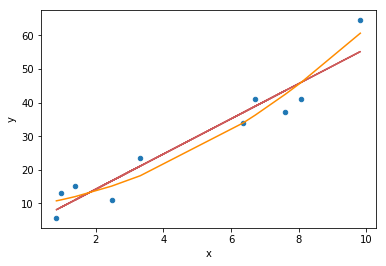

In [180]:
ax = dfline.plot(x='x', y='y', kind='scatter')
ax.plot(dfline.x, model.fittedvalues, color="IndianRed")

df1_ = dfline.sort_values(by='x')
ax.plot(df1_.x, model2.predict(df1_), color="DarkOrange")


NOTE: this below is a WRONG way to plot this model! - plot your models properly by either sorting the df and then predicting the y values, or passing a sorted array to the model (as above)

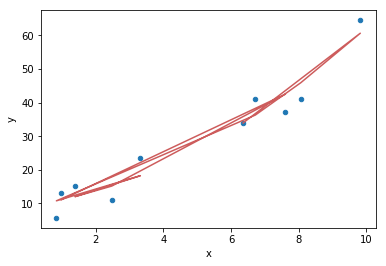

In [183]:
ax = dfline.plot(x='x', y='y', kind='scatter')
ax.plot(dfline.x, model2.fittedvalues, color="IndianRed")
